In [1]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import EoN

In [2]:
def run_simulation1(population=1000, expected_partners=5, transmission_rate=0.3, recovery_rate=1.0, initial_fraction_infected=0.005):
    print("Infection rate:    ", transmission_rate)
    print("Recovery rate:     ", recovery_rate)
    print("Initial infection: ", initial_fraction_infected)

    G = nx.fast_gnp_random_graph(population, expected_partners/(population-1))
    
    #create simulation
    return EoN.Gillespie_SIR(G, tau=transmission_rate, gamma=recovery_rate, rho=initial_fraction_infected, return_full_data=True)

In [3]:
def run_simulation2(transmission_rate=1.0, recovery_rate=1.0):
    print("Infection rate:    ", transmission_rate)
    print("Recovery rate:     ", recovery_rate)

    G = nx.karate_club_graph()
    
    #create simulation
    return EoN.Gillespie_SIR(G, tau=transmission_rate, gamma=recovery_rate, return_full_data=True)

In [4]:
def plot_simulation(sim):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5))

    t = sim.t()
    S = sim._summary_[1]['S']
    I = sim._summary_[1]['I']
    R = sim._summary_[1]['R']

    # SIRV
    ax1.plot(t, S, label="Susceptible")
    ax1.plot(t, I, label="Infectious")
    ax1.plot(t, R, label="Recovered")

    ax1.set_title("SIR")
    ax1.set_xlim([t[0], t[-1]])
    ax1.set_ylim([0, S[0]])

    # Infectious
    xpos = t[np.argmax(I)]

    ax2.plot(t, I, label="Infectious")
    ax2.axvline(x=xpos, c="black")

    ax2.set_title("Infectious (I) Compartment")
    ax2.set_xlim([t[0], t[-1]])
    ax2.set_ylim([0, np.max(I)])

    plt.tight_layout()
    plt.legend()
    plt.show()

In [5]:
sim = run_simulation2(1.5, 1)

Infection rate:     1.5
Recovery rate:      1


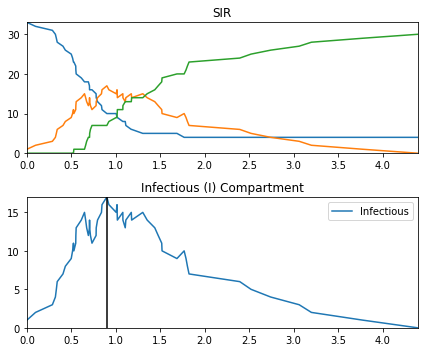

In [6]:
plot_simulation(sim)

(<AxesSubplot:>,
 [<AxesSubplot:title={'center':'$S$, $I$, $R$'}, xlabel='$t$'>])

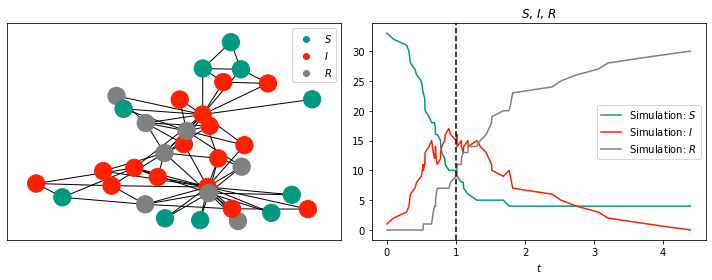

In [7]:
sim.display(1, ts_plots=[['S', 'I', 'R']])

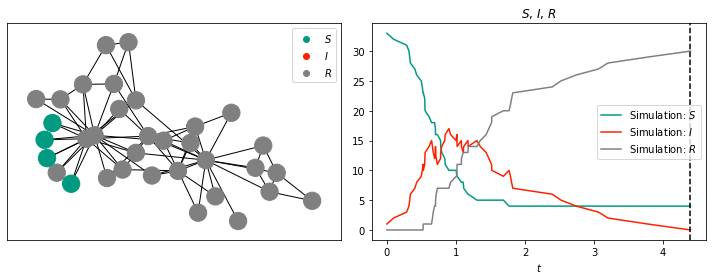

In [9]:
ani = sim.animate(ts_plots=[['S', 'I', 'R']])
ani.save('render/sir-karate-beta1.5_gamma1222.mp4', fps=30, dpi=200, bitrate=1000, codec='libx264', extra_args=['-pix_fmt', 'yuv420p'])